In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import ipdb
from numpy.linalg import inv

In [2]:
df_X = pd.read_csv('http://cs229.stanford.edu/ps/ps1/logistic_x.txt', sep='\ +', header=None, engine='python')
ys = pd.read_csv('http://cs229.stanford.edu/ps/ps1/logistic_y.txt', sep='\ +', header=None, engine='python')
ys = ys.astype(int)

In [3]:
df_X['label'] = ys[0].values

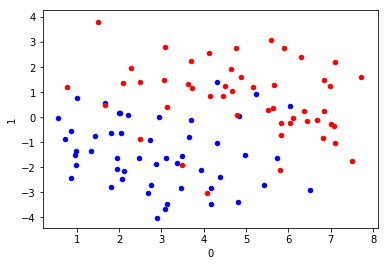

In [4]:
ax = plt.axes()

df_X.query('label == -1').plot.scatter(x=0, y=1, ax=ax, color='blue')
df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

In [5]:
Xs = df_X[[0, 1]].values

In [6]:
# adding a columns of ones for the intercept terms, and also use column vectors
Xs = np.hstack([np.ones((Xs.shape[0], 1)), Xs])
ys = df_X['label'].values

In [10]:
def hessian_step(theta):
    z = ys * (Xs.dot(theta))
    gz = 1 / (1 + np.exp(-z))
    leng = theta.shape[0]
    H = np.zeros([leng, leng])
    for i in np.arange(leng):
        for j in np.arange(leng):
            if i <= j:
                H[i][j] = np.mean(gz * (1-gz) * Xs[:,i]* Xs[:,j])
            else:
                H[i][j] = H[j][i]
    J =  np.mean((gz - 1) * ys * Xs.T, axis=1)
    H_1 = inv(H)
    delta = H_1.dot(np.array(J).T)
    return delta

In [61]:
#initialize theta, theta_array, intercept_term
theta = np.zeros(Xs.shape[1])
thetas = []
i = 1
tol = 1
error = 1e-6
#iteration
while(tol >= error):
    old_theta = theta.copy()
    theta -= hessian_step(theta)
    tol = np.sum(np.abs(theta - old_theta))
    print("Iteration ", i, " : tol = ", tol)
    i += 1
    thetas.append(old_theta)
print("Final theta = ", theta)

Iteration  1  : tol =  2.566552594633161
Iteration  2  : tol =  1.254968154416901
Iteration  3  : tol =  0.6091027805858464
Iteration  4  : tol =  0.11839148431200686
Iteration  5  : tol =  0.0038109710361337035
Iteration  6  : tol =  3.889656823075072e-06
Iteration  7  : tol =  4.1457948185552596e-12
Final theta =  [-2.6205116   0.76037154  1.17194674]


In [62]:
thetas

[array([0., 0., 0.]),
 array([-1.50983811,  0.43509696,  0.62161752]),
 array([-2.21834632,  0.64372727,  0.95944716]),
 array([-2.55431051,  0.74137714,  1.13493588]),
 array([-2.61847133,  0.75979248,  1.1707512 ]),
 array([-2.62050954,  0.76037096,  1.17194549]),
 array([-2.6205116 ,  0.76037154,  1.17194674])]

/home/sean/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


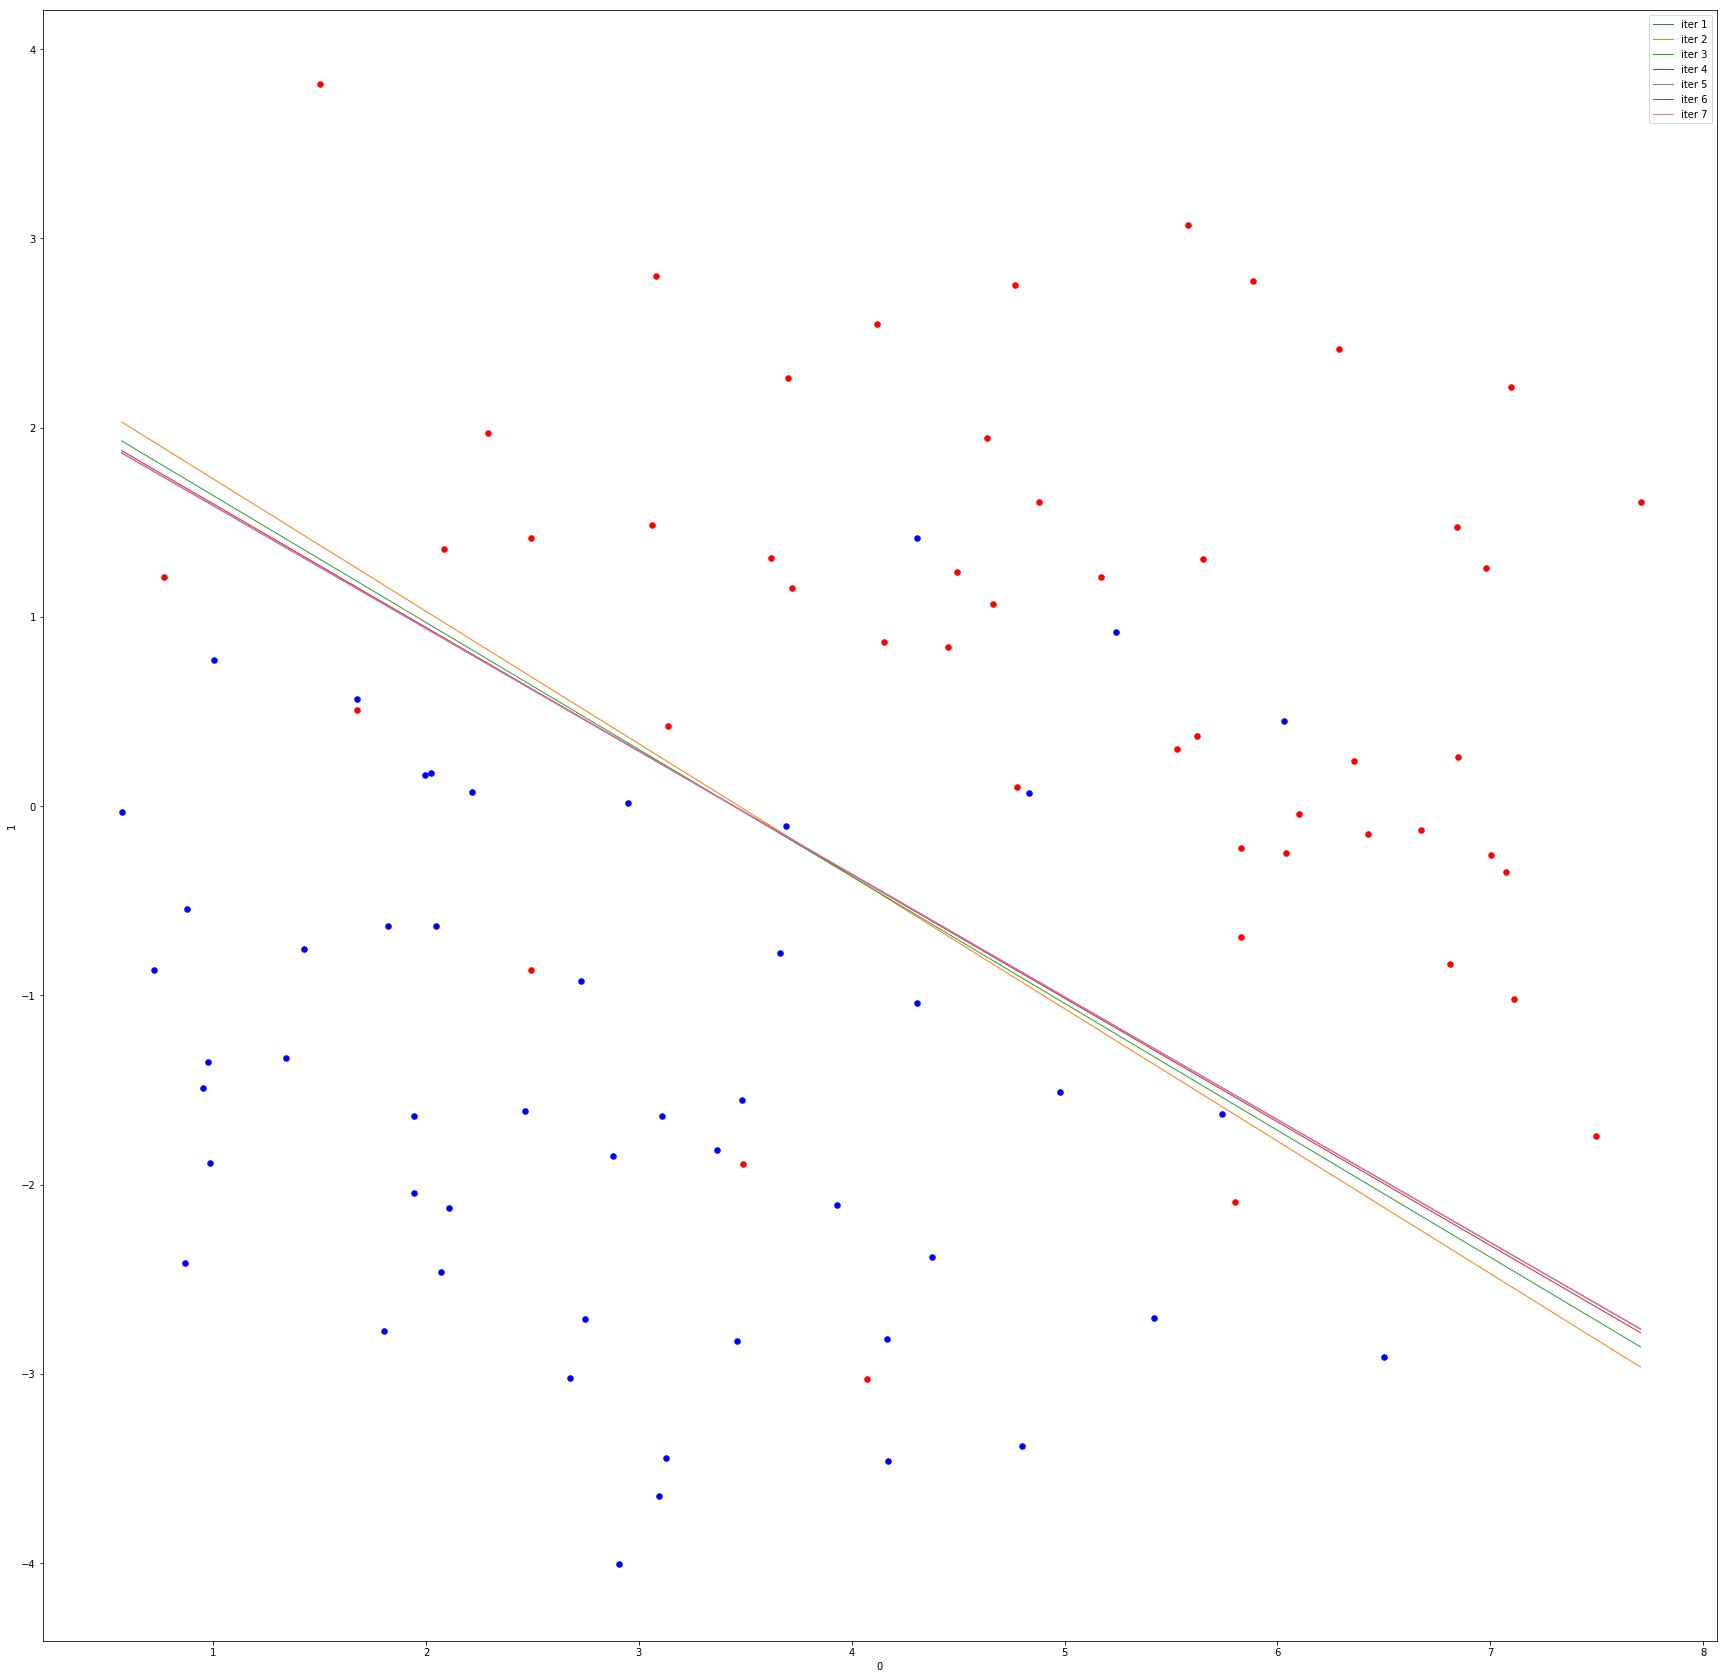

In [64]:
fig = plt.figure(figsize=[30, 30])
ax = fig.add_subplot(111)


df_X.query("label == 1").plot.scatter(x=0, y=1, s= 30, c="red", ax=ax)
df_X.query("label == -1").plot.scatter(x=0, y=1, s= 30, c="blue", ax=ax)

x = np.linspace(df_X[0].min(), df_X[0].max())
for k, theta in enumerate(thetas):
    y = (theta[0] + theta[1] * x) / (- theta[2])
    plt.plot(x, y, label='iter {0}'.format(k + 1), lw=1)
plt.legend()